# Study the data statistics of the adept dataset (val).
29.11.2023

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Please replace the following paths with your own paths if you are using different ones.
PROJECT_PATH = "<root_dir_of_this_repo>"
DATA_PATH = PROJECT_PATH + "datasets/adept/train-dev-test-split/"
CACHE_PATH = PROJECT_PATH + "cache/"

In [3]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', cache_dir=CACHE_PATH)

/mount/studenten/arbeitsdaten-studenten1/shencg/condaenvs/semplausWS2324/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


## Val

In [4]:
val_set = json.load(open(DATA_PATH + "val.json"))
print(len(val_set))
val_set

1611


[{'sentence1': 'An ottoman is for reclining your legs.',
  'sentence2': 'A comfortable ottoman is for reclining your legs.',
  'modifier': 'comfortable',
  'noun': 'ottoman',
  'label': 3,
  'idx': 27},
 {'sentence1': 'A butcher bones a roast.',
  'sentence2': 'A local butcher bones a roast.',
  'modifier': 'local',
  'noun': 'butcher',
  'label': 2,
  'idx': 12331},
 {'sentence1': 'Creditors lends money to debters.',
  'sentence2': 'Aware creditors lends money to debters.',
  'modifier': 'aware',
  'noun': 'creditors',
  'label': 2,
  'idx': 11750},
 {'sentence1': 'You use a lobby to loiter.',
  'sentence2': 'You use a flashy lobby to loiter.',
  'modifier': 'flashy',
  'noun': 'lobby',
  'label': 2,
  'idx': 5254},
 {'sentence1': 'You use a tenor to drown out a conversation.',
  'sentence2': 'You use a dramatic tenor to drown out a conversation.',
  'modifier': 'dramatic',
  'noun': 'tenor',
  'label': 2,
  'idx': 11609},
 {'sentence1': 'An oven is found in a kitchen.',
  'sentence2'

In [5]:
val_set_df = pd.read_json(DATA_PATH + "val.json")
val_set_df

,sentence1,sentence2,modifier,noun,label,idx
0,An ottoman is for reclining your legs.,A comfortable ottoman is for reclining your legs.,comfortable,ottoman,3,27
1,A butcher bones a roast.,A local butcher bones a roast.,local,butcher,2,12331
2,Creditors lends money to debters.,Aware creditors lends money to debters.,aware,creditors,2,11750
3,You use a lobby to loiter.,You use a flashy lobby to loiter.,flashy,lobby,2,5254
4,You use a tenor to drown out a conversation.,You use a dramatic tenor to drown out a conver...,dramatic,tenor,2,11609
...,...,...,...,...,...,...
1606,A name is for identifying people.,A plausible name is for identifying people.,plausible,name,2,10871
1607,A bush is alive.,A hairy bush is alive.,hairy,bush,0,8148
1608,A trumpet is for annoying the neighbors.,A dead trumpet is for annoying the neighbors.,dead,trumpet,0,12818
1609,Height matters in basketball.,Raised height matters in basketball.,raised,height,2,7340


### Check sentence1

In [6]:
sentence1 = val_set_df['sentence1'].tolist()
print(len(sentence1))
sentence1_set = list(set(sentence1))
print(len(sentence1_set))

1611
1591


In [7]:
sentence1_lengths = []
for sent in sentence1:
    encoded_input = tokenizer(sent, add_special_tokens=False)['input_ids']
    sentence1_lengths.append(len(encoded_input))
print(sentence1_lengths)

[9, 6, 8, 8, 10, 8, 7, 8, 7, 6, 4, 7, 10, 9, 8, 10, 6, 6, 10, 8, 7, 7, 9, 4, 8, 5, 10, 6, 11, 7, 9, 7, 8, 7, 4, 5, 9, 7, 9, 7, 6, 7, 11, 8, 8, 8, 8, 6, 7, 10, 7, 8, 6, 5, 5, 7, 9, 10, 8, 9, 10, 6, 7, 9, 11, 7, 6, 9, 10, 8, 11, 5, 5, 8, 8, 5, 7, 11, 9, 9, 8, 4, 7, 7, 7, 4, 9, 7, 7, 8, 9, 8, 8, 4, 6, 5, 8, 4, 9, 7, 12, 6, 6, 8, 10, 8, 6, 6, 18, 10, 8, 5, 13, 6, 6, 5, 6, 5, 9, 10, 6, 11, 7, 7, 6, 11, 9, 8, 10, 7, 4, 6, 5, 5, 6, 6, 9, 8, 8, 7, 4, 6, 9, 5, 9, 6, 5, 5, 10, 5, 13, 9, 8, 6, 10, 4, 6, 6, 8, 7, 7, 8, 7, 4, 9, 6, 6, 9, 9, 7, 6, 8, 6, 7, 9, 10, 10, 4, 7, 8, 13, 11, 6, 5, 10, 6, 7, 7, 6, 8, 10, 7, 7, 7, 7, 9, 9, 8, 6, 8, 10, 9, 8, 9, 6, 11, 9, 10, 7, 6, 6, 10, 8, 8, 9, 7, 12, 4, 5, 4, 8, 5, 7, 8, 6, 6, 10, 5, 11, 12, 8, 4, 7, 7, 6, 7, 6, 10, 5, 4, 7, 15, 11, 7, 4, 9, 10, 8, 7, 7, 8, 7, 6, 6, 5, 5, 7, 9, 7, 6, 7, 7, 5, 10, 4, 6, 14, 6, 5, 6, 9, 12, 11, 9, 9, 11, 6, 5, 8, 10, 7, 12, 9, 7, 9, 4, 5, 7, 10, 5, 6, 13, 10, 5, 7, 9, 13, 8, 7, 5, 8, 9, 9, 8, 5, 10, 9, 8, 9, 10, 7, 7, 9, 7, 

In [8]:
sentence1_lengths = np.asarray(sentence1_lengths)

# average length
print('average length:', sentence1_lengths.mean())

# min length
print('min length:', sentence1_lengths.min())

# max length
print('max length:', sentence1_lengths.max())

# variance
print('variance:', sentence1_lengths.var())

# std
print('std:', sentence1_lengths.std())

average length: 7.487274984481688
min length: 3
max length: 18
variance: 4.557721376276769
std: 2.1348820520761254


### Check sentence2

In [10]:
sentence2 = val_set_df['sentence2'].tolist()
print(len(sentence2))
sentence2_set = list(set(sentence2))
print(len(sentence2_set))

1611
1611


In [11]:
sentence2_lengths = []
for sent in sentence2:
    encoded_input = tokenizer(sent, add_special_tokens=False)['input_ids']
    sentence2_lengths.append(len(encoded_input))
print(sentence2_lengths)

[10, 7, 9, 10, 11, 9, 8, 9, 8, 7, 5, 8, 11, 10, 9, 11, 7, 7, 11, 10, 8, 8, 10, 5, 9, 8, 11, 7, 12, 9, 10, 8, 9, 8, 5, 6, 10, 9, 10, 8, 10, 8, 12, 9, 9, 9, 9, 7, 8, 11, 8, 9, 7, 6, 6, 8, 10, 11, 9, 10, 12, 8, 9, 10, 12, 8, 9, 10, 11, 9, 13, 6, 6, 9, 10, 6, 8, 14, 10, 10, 11, 5, 8, 8, 8, 5, 10, 8, 8, 9, 10, 9, 9, 5, 7, 6, 9, 5, 13, 8, 13, 7, 7, 9, 11, 10, 7, 7, 19, 11, 9, 6, 14, 7, 7, 6, 7, 6, 10, 11, 7, 12, 8, 8, 7, 12, 11, 9, 11, 8, 5, 8, 6, 6, 7, 9, 11, 9, 9, 8, 5, 7, 10, 8, 10, 7, 6, 6, 11, 6, 14, 10, 9, 8, 14, 5, 7, 7, 9, 8, 10, 9, 8, 5, 10, 7, 7, 10, 10, 8, 7, 9, 7, 8, 10, 11, 11, 5, 8, 9, 14, 12, 7, 6, 11, 7, 8, 8, 7, 9, 13, 11, 8, 8, 8, 10, 10, 9, 7, 9, 11, 10, 9, 10, 7, 12, 10, 11, 8, 7, 7, 11, 9, 9, 10, 8, 13, 5, 6, 5, 9, 8, 8, 9, 7, 7, 12, 6, 12, 13, 9, 5, 9, 8, 7, 8, 7, 11, 6, 5, 8, 16, 12, 8, 5, 10, 11, 9, 8, 8, 9, 8, 7, 7, 6, 6, 8, 10, 8, 8, 8, 8, 6, 11, 6, 7, 15, 7, 6, 7, 10, 13, 14, 10, 10, 12, 7, 6, 9, 11, 8, 13, 10, 8, 10, 5, 6, 8, 11, 6, 8, 14, 11, 6, 8, 10, 14, 9, 9, 

In [12]:
sentence2_lengths = np.asarray(sentence2_lengths)

# average length
print('average length:', sentence2_lengths.mean())

# min length
print('min length:', sentence2_lengths.min())

# max length
print('max length:', sentence2_lengths.max())

# variance
print('variance:', sentence2_lengths.var())

# std
print('std:', sentence2_lengths.std())

average length: 8.674736188702669
min length: 4
max length: 19
variance: 4.903514440024953
std: 2.2143880509127016


### Check (sentence1, sentence2)

In [13]:
sentpairs = [(sent1, sent2) for sent1, sent2 in zip(sentence1, sentence2)]
print(len(sentpairs))
sentpairs_set = list(set(sentpairs))
print(len(sentpairs_set))

1611
1611


In [14]:
sentpair_lengths = []
for sent1, sent2 in sentpairs:
    # Concatenate sent1 and sent2 using a whitespace inbetween.
    sent12 = sent1 + " " + sent2
    encoded_input = tokenizer(sent12, add_special_tokens=False)['input_ids']
    sentpair_lengths.append(len(encoded_input))
print(sentpair_lengths)

[19, 13, 17, 18, 21, 17, 15, 17, 15, 13, 9, 15, 21, 19, 17, 21, 13, 13, 21, 18, 15, 15, 19, 9, 17, 13, 21, 13, 23, 16, 19, 15, 17, 15, 9, 11, 19, 16, 19, 15, 16, 15, 23, 17, 17, 17, 17, 13, 15, 21, 15, 17, 13, 11, 11, 15, 19, 21, 17, 19, 22, 14, 16, 19, 23, 15, 15, 19, 21, 17, 24, 11, 11, 17, 18, 11, 15, 25, 19, 19, 19, 9, 15, 15, 15, 9, 19, 15, 15, 17, 19, 17, 17, 9, 13, 11, 17, 9, 22, 15, 25, 13, 13, 17, 21, 18, 13, 13, 37, 21, 17, 11, 27, 13, 13, 11, 13, 11, 19, 21, 13, 23, 15, 15, 13, 23, 20, 17, 21, 15, 9, 14, 11, 11, 13, 15, 20, 17, 17, 15, 9, 13, 19, 13, 19, 13, 11, 11, 21, 11, 27, 19, 17, 14, 24, 9, 13, 13, 17, 15, 17, 17, 15, 9, 19, 13, 13, 19, 19, 15, 13, 17, 13, 15, 19, 21, 21, 9, 15, 17, 27, 23, 13, 11, 21, 13, 15, 15, 13, 17, 23, 18, 15, 15, 15, 19, 19, 17, 13, 17, 21, 19, 17, 19, 13, 23, 19, 21, 15, 13, 13, 21, 17, 17, 19, 15, 25, 9, 11, 9, 17, 13, 15, 17, 13, 13, 22, 11, 23, 25, 17, 9, 16, 15, 13, 15, 13, 21, 11, 9, 15, 31, 23, 15, 9, 19, 21, 17, 15, 15, 17, 15, 13, 13, 

In [15]:
sentpair_lengths = np.asarray(sentpair_lengths)

# average length
print('average length:', sentpair_lengths.mean())

# min length
print('min length:', sentpair_lengths.min())

# max length
print('max length:', sentpair_lengths.max())

# variance
print('variance:', sentpair_lengths.var())

# std
print('std:', sentpair_lengths.std())

average length: 16.162011173184357
min length: 7
max length: 37
variance: 18.58269092724946
std: 4.310764540919564


### Check modifiers

In [17]:
modifiers = val_set_df['modifier'].tolist()
print(len(modifiers))
modifiers_set = list(set(modifiers))
print(len(modifiers_set))

1611
779


In [18]:
modifier_counter = dict(Counter(modifiers))

# Sort the data in descending order.
modifier_counter = {k: v for k, v in sorted(modifier_counter.items(), key=lambda item: item[1], reverse=True)}
modifier_counter

{'virtual': 55,
 'former': 42,
 'dead': 36,
 'artificial': 27,
 'fake': 24,
 'false': 22,
 'historic': 20,
 'potential': 19,
 'new': 19,
 'possible': 19,
 'old': 11,
 'hypothetical': 11,
 'good': 11,
 'future': 10,
 'alleged': 10,
 'red': 9,
 'past': 9,
 'large': 9,
 'small': 9,
 'free': 9,
 'fictional': 9,
 'little': 8,
 'traditional': 8,
 'impossible': 8,
 'local': 7,
 'hot': 7,
 'strong': 7,
 'blue': 7,
 'mock': 7,
 'wet': 7,
 'theoretical': 7,
 'solid': 7,
 'single': 7,
 'likely': 6,
 'apparent': 6,
 'proposed': 6,
 'so-called': 6,
 'modern': 6,
 'second': 6,
 'great': 6,
 'simulated': 6,
 'high': 6,
 'green': 6,
 'supposed': 6,
 'simple': 5,
 'counterfeit': 5,
 'primary': 5,
 'professional': 5,
 'young': 5,
 'suspicious': 5,
 'fictitious': 5,
 'bad': 5,
 'original': 5,
 'probable': 5,
 'current': 5,
 'final': 4,
 'next': 4,
 'nice': 4,
 'full': 4,
 'top': 4,
 'soft': 4,
 'heavy': 4,
 'early': 4,
 'third': 4,
 'late': 4,
 'classic': 4,
 'right': 4,
 'imaginary': 4,
 'active': 4,
 '

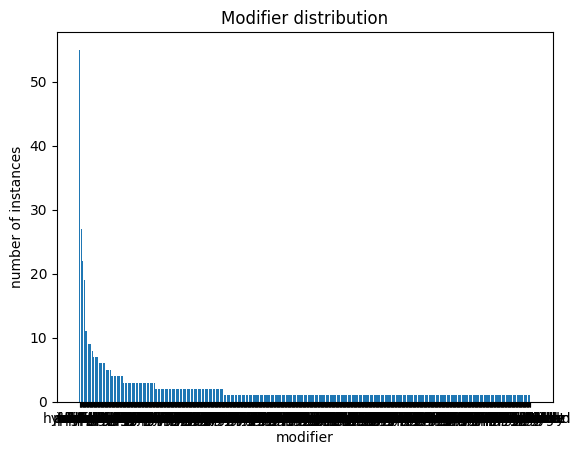

In [21]:
# Create a bar diagram
plt.bar(modifier_counter.keys(), modifier_counter.values())

# Add title and labels
plt.title('Modifier distribution')
plt.xlabel('modifier')
plt.ylabel('number of instances')

# Show the value on top of each bar
# for key, value in modifier_counter.items():
#     plt.text(key, value, f'{value}', ha='center', va='bottom')

# Display the plot
plt.show()

In [22]:
first10_modifiers = list(modifier_counter.items())[:10]
first10_modifiers = dict(first10_modifiers)
first10_modifiers

{'virtual': 55,
 'former': 42,
 'dead': 36,
 'artificial': 27,
 'fake': 24,
 'false': 22,
 'historic': 20,
 'potential': 19,
 'new': 19,
 'possible': 19}

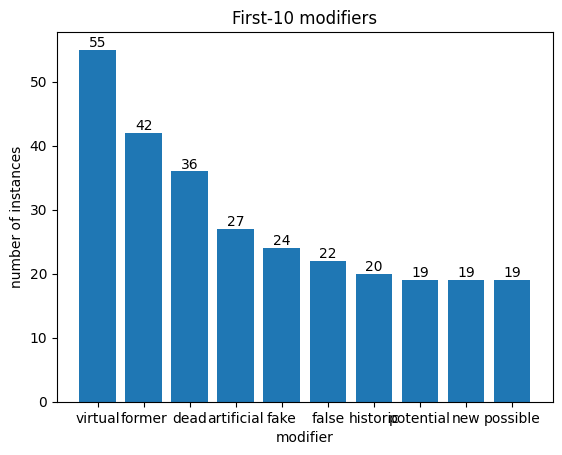

In [23]:
# Create a bar diagram
plt.bar(first10_modifiers.keys(), first10_modifiers.values())

# Add title and labels
plt.title('First-10 modifiers')
plt.xlabel('modifier')
plt.ylabel('number of instances')

# Show the value on top of each bar
for key, value in first10_modifiers.items():
    plt.text(key, value, f'{value}', ha='center', va='bottom')

# Display the plot
plt.show()

In [24]:
last10_modifiers = list(modifier_counter.items())[-10:]
last10_modifiers = dict(last10_modifiers)
last10_modifiers

{'alive': 1,
 'convertible': 1,
 'bittersweet': 1,
 'underground': 1,
 'eighth': 1,
 'kinetic': 1,
 'plausible': 1,
 'hairy': 1,
 'raised': 1,
 'modified': 1}

### Check nouns

In [26]:
nouns = val_set_df['noun'].tolist()
print(len(nouns))
nouns_set = list(set(nouns))
print(len(nouns_set))

1611
1030


In [27]:
noun_counter = dict(Counter(nouns))

# Sort the data in descending order.
noun_counter = {k: v for k, v in sorted(noun_counter.items(), key=lambda item: item[1], reverse=True)}
noun_counter

{'rule': 9,
 'president': 6,
 'glue': 6,
 'reading': 6,
 'candle': 6,
 'government': 6,
 'thief': 5,
 'people': 5,
 'hose': 5,
 'chain': 5,
 'scene': 5,
 'comb': 5,
 'flute': 5,
 'track': 5,
 'child': 5,
 'person': 5,
 'kitchen': 5,
 'kite': 4,
 'sun': 4,
 'basket': 4,
 'table': 4,
 'trumpet': 4,
 'head': 4,
 'driver': 4,
 'cleaning': 4,
 'wagon': 4,
 'priest': 4,
 'police': 4,
 'metal': 4,
 'curb': 4,
 'shop': 4,
 'saucepan': 4,
 'college': 4,
 'ear': 4,
 'wardrobe': 4,
 'art': 4,
 'performance': 4,
 'pilot': 4,
 'place': 4,
 'ticket': 4,
 'chicken': 4,
 'poem': 4,
 'tables': 4,
 'tourniquet': 4,
 'shopping': 4,
 'lamp': 4,
 'sheet': 4,
 'sound': 4,
 'story': 4,
 'dog': 4,
 'teacher': 4,
 'oil': 4,
 'gas': 4,
 'garbage': 3,
 'garage': 3,
 'fur': 3,
 'silver': 3,
 'basketball': 3,
 'pillowcase': 3,
 'bookstore': 3,
 'politicians': 3,
 'vehicle': 3,
 'army': 3,
 'magazines': 3,
 'wing': 3,
 'album': 3,
 'bathing': 3,
 'rock': 3,
 'banker': 3,
 'house': 3,
 'ship': 3,
 'plumber': 3,
 'le

In [28]:
first10_nouns = list(noun_counter.items())[:10]
first10_nouns = dict(first10_nouns)
first10_nouns

{'rule': 9,
 'president': 6,
 'glue': 6,
 'reading': 6,
 'candle': 6,
 'government': 6,
 'thief': 5,
 'people': 5,
 'hose': 5,
 'chain': 5}

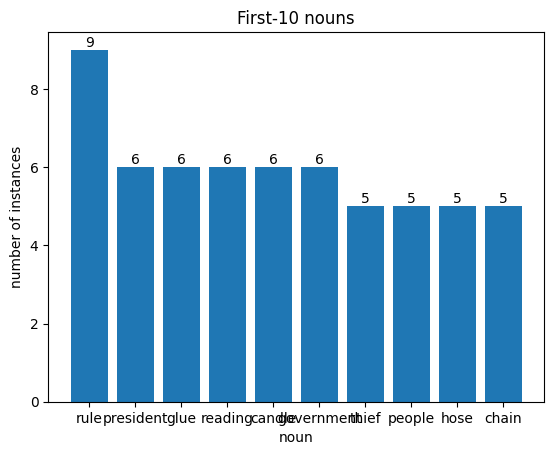

In [29]:
# Create a bar diagram
plt.bar(first10_nouns.keys(), first10_nouns.values())

# Add title and labels
plt.title('First-10 nouns')
plt.xlabel('noun')
plt.ylabel('number of instances')

# Show the value on top of each bar
for key, value in first10_nouns.items():
    plt.text(key, value, f'{value}', ha='center', va='bottom')

# Display the plot
plt.show()

In [30]:
last10_nouns = list(noun_counter.items())[-10:]
last10_nouns = dict(last10_nouns)
last10_nouns

{'glaucoma': 1,
 'den': 1,
 'male': 1,
 'portrait': 1,
 'prisoner': 1,
 'spacecraft': 1,
 'watch': 1,
 'name': 1,
 'bush': 1,
 'repairman': 1}

### Check labels

In [31]:
labels = val_set_df['label'].tolist()
print(len(labels))
labels_set = list(set(labels))
print(len(labels_set))

1611
5


In [32]:
label_counter = dict(Counter(labels))

# Sort the data in descending order.
label_counter = {k: v for k, v in sorted(label_counter.items(), key=lambda item: item[1], reverse=True)}
label_counter

{2: 1070, 0: 236, 1: 186, 3: 102, 4: 17}

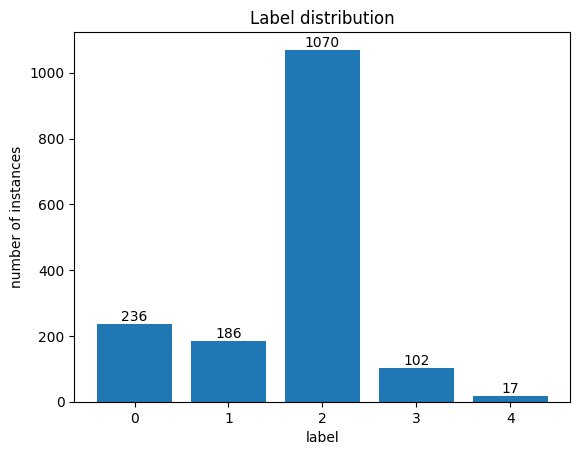

In [33]:
# Create a bar diagram
plt.bar(label_counter.keys(), label_counter.values())

# Add title and labels
plt.title('Label distribution')
plt.xlabel('label')
plt.ylabel('number of instances')

# Show the value on top of each bar
for key, value in label_counter.items():
    plt.text(key, value, f'{value}', ha='center', va='bottom')

# Display the plot
plt.show()